In [28]:
import requests

# Define the URL
url = "https://cars-com2.p.rapidapi.com/search?"

# Set the headers
headers = {
    "x-rapidapi-host": "cars-com2.p.rapidapi.com",
    "x-rapidapi-key": "0ae4053670mshb40af86dcc17780p1fde6bjsn246e7a6d28ee"
}

# Make the GET request
response = requests.get(url, headers=headers)

# Check the response
if response.status_code == 200:
    data = response.json()  # Parse the response JSON
    print(data)  # Print the returned data
else:
    print(f"Error: {response.status_code}")


[{'id': 'aa2de287-585f-4dca-b2c4-73596c0c6396', 'image': 'https://platform.cstatic-images.com/large/in/v2/8d51eafb-c34e-5f3b-b78f-939233f818d5/3ffea83b-e801-4655-8612-d21bf9915b2f/xy3q5dSp8rsnJO7BAGmJU2vIJQ0.jpg', 'trim': 'Black Edition', 'make': 'Honda', 'cat': 'truck_compact', 'year': '2025', 'customer_id': '5125', 'certified_preowned': False, 'mileage': '6', 'stock_type': 'New', 'model': 'Ridgeline', 'sponsored': False, 'nvi_program': False, 'exterior_color': 'Sonic Gray Pearl', 'fuel_type': 'Gasoline', 'interior_color': 'Black', 'vin': '5FPYK3F80SB000457', 'drivetrain': 'All-wheel Drive', 'dealer_name': 'Clinton Honda', 'msrp': '48600', 'dealer_zip': '08801', 'seller_type': 'dealership', 'sponsored_type': 'standard', 'price': '48600', 'bodystyle': 'Truck', 'cpo_indicator': False, 'vertical_position': 1, 'badges': [], 'canonical_mmt': 'Honda:Ridgeline:Black Edition', 'canonical_mmty': 'Honda:Ridgeline:Black Edition:2025', 'photo_count': 28, 'stock_sub': ''}, {'id': 'da4011c1-3933-43

In [29]:

import csv


if response.status_code == 200:
    data = response.json()
    listings = data # Adjust to match the actual key in the response
    
    # Define the fields you want to extract
    fieldnames = [
        'make', 'model', 'trim', 'year', 'mileage', 'stock_type', 'fuel_type',
        'drivetrain', 'msrp', 'bodystyle', 'exterior_color', 'interior_color',
        'certified_preowned', 'seller_type', 'dealer_zip'
    ]

    # Write data to a CSV file
    with open('car_data.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for car in listings:
            writer.writerow({
                'make': car.get('make'),
                'model': car.get('model'),
                'trim': car.get('trim'),
                'year': car.get('year'),
                'mileage': car.get('mileage'),
                'stock_type': car.get('stock_type'),
                'fuel_type': car.get('fuel_type'),
                'drivetrain': car.get('drivetrain'),
                'msrp': car.get('msrp'),
                'bodystyle': car.get('bodystyle'),
                'exterior_color': car.get('exterior_color'),
                'interior_color': car.get('interior_color'),
                'certified_preowned': car.get('certified_preowned'),
                'seller_type': car.get('seller_type'),
                'dealer_zip': car.get('dealer_zip')
            })
    print("Data saved to car_data.csv")
else:
    print(f"Error: {response.status_code}")


Data saved to car_data.csv


In [30]:
response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    print(type(data))

<class 'list'>


In [31]:
import pandas as pd
car=pd.read_csv("car_data.csv")
car.head()

,make,model,trim,year,mileage,stock_type,fuel_type,drivetrain,msrp,bodystyle,exterior_color,interior_color,certified_preowned,seller_type,dealer_zip,price
0,Honda,Ridgeline,Black Edition,2025,6.0,New,Gasoline,All-wheel Drive,48600.0,Truck,Sonic Gray Pearl,Black,False,dealership,8801,48600
1,GMC,Sierra 2500,Denali,2025,0.0,New,Diesel,Four Wheel Drive,98345.0,Truck,Onyx Black,Alpine Umber,False,dealership,87507,98345
2,Jeep,Compass,Limited,2025,12.0,New,Regular Unleaded,Four Wheel Drive,37710.0,SUV,Silver Zynith Metallic Clearcoat,Black,False,dealership,65706,34986
3,Ford,Explorer,ST,2022,16404.0,Used,Gasoline,Rear-wheel Drive,NaN,SUV,Silver,BLACK,False,dealership,29579,43998
4,Kia,Telluride,SX,2025,4.0,New,Gasoline,All-wheel Drive,50265.0,NaN,Ebony Black,NaN,False,dealership,6810,50265


In [32]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                20 non-null     object 
 1   model               20 non-null     object 
 2   trim                20 non-null     object 
 3   year                20 non-null     int64  
 4   mileage             19 non-null     float64
 5   stock_type          20 non-null     object 
 6   fuel_type           20 non-null     object 
 7   drivetrain          20 non-null     object 
 8   msrp                17 non-null     float64
 9   bodystyle           15 non-null     object 
 10  exterior_color      20 non-null     object 
 11  interior_color      15 non-null     object 
 12  certified_preowned  20 non-null     bool   
 13  seller_type         20 non-null     object 
 14  dealer_zip          20 non-null     int64  
 15  price               20 non-null     int64  
dtypes: bool(1)

In [33]:
car.describe()

,year,mileage,msrp,dealer_zip,price
count,20.000000,19.000000,17.000000,20.000000,20.000000
mean,2023.300000,20757.684211,45542.352941,28782.850000,42342.000000
std,4.181413,55313.412493,19753.816650,22887.277926,20467.561326
min,2011.000000,0.000000,0.000000,6810.000000,2900.000000
25%,2025.000000,2.500000,37710.000000,8303.250000,34286.250000
50%,2025.000000,4.000000,44830.000000,30492.500000,44414.000000
75%,2025.000000,13.500000,48620.000000,44424.000000,48605.000000
max,2025.000000,203865.000000,98345.000000,87507.000000,98345.000000


In [34]:
car.isnull().sum()

make                  0
model                 0
trim                  0
year                  0
mileage               1
stock_type            0
fuel_type             0
drivetrain            0
msrp                  3
bodystyle             5
exterior_color        0
interior_color        5
certified_preowned    0
seller_type           0
dealer_zip            0
price                 0
dtype: int64

In [35]:
#dropping null value rows
car.dropna()

,make,model,trim,year,mileage,stock_type,fuel_type,drivetrain,msrp,bodystyle,exterior_color,interior_color,certified_preowned,seller_type,dealer_zip,price
0,Honda,Ridgeline,Black Edition,2025,6.0,New,Gasoline,All-wheel Drive,48600.0,Truck,Sonic Gray Pearl,Black,False,dealership,8801,48600
1,GMC,Sierra 2500,Denali,2025,0.0,New,Diesel,Four Wheel Drive,98345.0,Truck,Onyx Black,Alpine Umber,False,dealership,87507,98345
2,Jeep,Compass,Limited,2025,12.0,New,Regular Unleaded,Four Wheel Drive,37710.0,SUV,Silver Zynith Metallic Clearcoat,Black,False,dealership,65706,34986
9,Honda,Passport,AWD Sport,2021,30998.0,Used,Gasoline,All-wheel Drive,0.0,SUV,Platinum White Pearl,Black,False,dealership,43123,28450
12,GMC,Sierra 2500,SLE,2025,1.0,New,Diesel,Four Wheel Drive,72670.0,Truck,Sterling Metallic,Jet Black,False,dealership,12901,72670
14,Chrysler,Pacifica,SELECT,2025,15.0,New,Gasoline,FWD,44640.0,Minivan,Fathom Blue Pearlcoat,Black,False,dealership,48723,41736
15,Honda,Ridgeline,RTL,2025,4.0,New,Gasoline,All-wheel Drive,45330.0,Truck,Red,Brown,False,dealership,31406,45330
16,Jeep,Compass,Limited,2025,0.0,New,Gasoline,4WD,34435.0,SUV,Diamond Black,Black,False,dealership,10512,34435
17,Honda,Ridgeline,RTL,2025,4.0,New,Gasoline,All-wheel Drive,44830.0,Truck,Red,Brown,False,dealership,31406,44830
18,Jeep,Compass,Limited,2025,0.0,New,Gasoline,4WD,33840.0,SUV,Bright White Clearcoat,Black,False,dealership,10512,33840


In [36]:
car.isnull().sum()

make                  0
model                 0
trim                  0
year                  0
mileage               1
stock_type            0
fuel_type             0
drivetrain            0
msrp                  3
bodystyle             5
exterior_color        0
interior_color        5
certified_preowned    0
seller_type           0
dealer_zip            0
price                 0
dtype: int64

In [41]:
car.dropna(subset=['fuel_type','msrp','interior_color','mileage'],inplace=True)

In [42]:
car.isnull().sum()

make                  0
model                 0
trim                  0
year                  0
mileage               0
stock_type            0
fuel_type             0
drivetrain            0
msrp                  0
bodystyle             0
exterior_color        0
interior_color        0
certified_preowned    0
seller_type           0
dealer_zip            0
price                 0
dtype: int64

In [47]:
car[''].unique()

array(['Gasoline', 'Diesel', 'Regular Unleaded'], dtype=object)

In [50]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Step 1: One-Hot Encoding for manageable categorical variables
clean_car= pd.get_dummies(car, columns=['trim', 'fuel_type', 'drivetrain'], drop_first=True)

# Step 2: Target Encoding for 'make' and 'model'
# Create target encoding for 'make' using the mean price
target_mean_make = car.groupby('make')['price'].mean()
clean_car['make_encoded'] = clean_car['make'].map(target_mean_make)

# Create target encoding for 'model' using the mean price
target_mean_model = car.groupby('model')['price'].mean()
clean_car['model_encoded'] = clean_car['model'].map(target_mean_model)

# Step 3: Drop original categorical columns (if not needed)
clean_car.drop(columns=['make', 'model'], inplace=True)

# Step 4: Feature Scaling
scaler = StandardScaler()
clean_car[['year', 'mileage', 'msrp', 'price']] = scaler.fit_transform(clean_car[['year', 'mileage', 'msrp', 'price']])

# Final DataFrame
clean_car

,year,mileage,stock_type,msrp,bodystyle,exterior_color,interior_color,certified_preowned,seller_type,dealer_zip,...,trim_SELECT,trim_SLE,trim_Sport,fuel_type_Gasoline,fuel_type_Regular Unleaded,drivetrain_All-wheel Drive,drivetrain_FWD,drivetrain_Four Wheel Drive,make_encoded,model_encoded
0,0.316228,-0.316026,New,0.168031,Truck,Sonic Gray Pearl,Black,False,dealership,8801,...,0,0,0,1,0,1,0,0,41802.5,46253.333333
1,0.316228,-0.316699,New,2.272288,Truck,Onyx Black,Alpine Umber,False,dealership,87507,...,0,0,0,0,0,0,0,1,85507.5,85507.500000
2,0.316228,-0.315352,New,-0.292626,SUV,Silver Zynith Metallic Clearcoat,Black,False,dealership,65706,...,0,0,0,0,1,0,0,1,33441.5,33441.500000
9,-3.162278,3.162277,Used,-1.887792,SUV,Platinum White Pearl,Black,False,dealership,43123,...,0,0,0,1,0,1,0,0,41802.5,28450.000000
12,0.316228,-0.316587,New,1.186213,Truck,Sterling Metallic,Jet Black,False,dealership,12901,...,0,1,0,0,0,0,0,1,85507.5,85507.500000
14,0.316228,-0.315016,New,0.000519,Minivan,Fathom Blue Pearlcoat,Black,False,dealership,48723,...,1,0,0,1,0,0,1,0,41736.0,41736.000000
15,0.316228,-0.316250,New,0.029707,Truck,Red,Brown,False,dealership,31406,...,0,0,0,1,0,1,0,0,41802.5,46253.333333
16,0.316228,-0.316699,New,-0.431161,SUV,Diamond Black,Black,False,dealership,10512,...,0,0,0,1,0,0,0,0,33441.5,33441.500000
17,0.316228,-0.316250,New,0.008556,Truck,Red,Brown,False,dealership,31406,...,0,0,0,1,0,1,0,0,41802.5,46253.333333
18,0.316228,-0.316699,New,-0.456330,SUV,Bright White Clearcoat,Black,False,dealership,10512,...,0,0,0,1,0,0,0,0,33441.5,33441.500000


In [54]:
import numpy as np
from sklearn.model_selection import train_test_split
X=clean_car[["year","mileage","stock_type","msrp","bodystyle","exterior_color","interior_color","certified_preowned","seller_type","dealer_zip","trim_SELECT","trim_SLE","trim_Sport","fuel_type_Gasoline","fuel_type_Regular Unleaded","drivetrain_All-wheel Drive","drivetrain_FWD","drivetrain_Four Wheel Drive","make_encoded","model_encoded"]]
y=clean_car["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
import category_encoders as ce
encoder=ce.BinaryEncoder(cols=['stock_type'])
clean_car=encoder.fit_transform(clean_car)
clean_car

,year,mileage,stock_type_0,stock_type_1,msrp,bodystyle,exterior_color,interior_color,certified_preowned,seller_type,...,trim_SELECT,trim_SLE,trim_Sport,fuel_type_Gasoline,fuel_type_Regular Unleaded,drivetrain_All-wheel Drive,drivetrain_FWD,drivetrain_Four Wheel Drive,make_encoded,model_encoded
0,0.316228,-0.316026,0,1,0.168031,Truck,Sonic Gray Pearl,Black,False,dealership,...,0,0,0,1,0,1,0,0,41802.5,46253.333333
1,0.316228,-0.316699,0,1,2.272288,Truck,Onyx Black,Alpine Umber,False,dealership,...,0,0,0,0,0,0,0,1,85507.5,85507.500000
2,0.316228,-0.315352,0,1,-0.292626,SUV,Silver Zynith Metallic Clearcoat,Black,False,dealership,...,0,0,0,0,1,0,0,1,33441.5,33441.500000
9,-3.162278,3.162277,1,0,-1.887792,SUV,Platinum White Pearl,Black,False,dealership,...,0,0,0,1,0,1,0,0,41802.5,28450.000000
12,0.316228,-0.316587,0,1,1.186213,Truck,Sterling Metallic,Jet Black,False,dealership,...,0,1,0,0,0,0,0,1,85507.5,85507.500000
14,0.316228,-0.315016,0,1,0.000519,Minivan,Fathom Blue Pearlcoat,Black,False,dealership,...,1,0,0,1,0,0,1,0,41736.0,41736.000000
15,0.316228,-0.316250,0,1,0.029707,Truck,Red,Brown,False,dealership,...,0,0,0,1,0,1,0,0,41802.5,46253.333333
16,0.316228,-0.316699,0,1,-0.431161,SUV,Diamond Black,Black,False,dealership,...,0,0,0,1,0,0,0,0,33441.5,33441.500000
17,0.316228,-0.316250,0,1,0.008556,Truck,Red,Brown,False,dealership,...,0,0,0,1,0,1,0,0,41802.5,46253.333333
18,0.316228,-0.316699,0,1,-0.456330,SUV,Bright White Clearcoat,Black,False,dealership,...,0,0,0,1,0,0,0,0,33441.5,33441.500000


In [62]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [64]:
X_train.dtypes

year                           float64
mileage                        float64
stock_type                      object
msrp                           float64
bodystyle                       object
exterior_color                  object
interior_color                  object
certified_preowned                bool
seller_type                     object
dealer_zip                       int64
trim_SELECT                      uint8
trim_SLE                         uint8
trim_Sport                       uint8
fuel_type_Gasoline               uint8
fuel_type_Regular Unleaded       uint8
drivetrain_All-wheel Drive       uint8
drivetrain_FWD                   uint8
drivetrain_Four Wheel Drive      uint8
make_encoded                   float64
model_encoded                  float64
dtype: object

In [65]:
X_train['stock_type'] = X_train['stock_type'].map({'New': 1, 'Used': 0})


In [79]:
clean_car.drop(columns=['exterior_color','interior_color','seller_type'])

,year,mileage,stock_type_0,stock_type_1,msrp,certified_preowned,dealer_zip,price,trim_Black Edition,trim_Denali,...,fuel_type_Regular Unleaded,drivetrain_All-wheel Drive,drivetrain_FWD,drivetrain_Four Wheel Drive,make_encoded,model_encoded,bodystyle_Minivan,bodystyle_SUV,bodystyle_Truck,stock_type
0,0.316228,-0.316026,0,1,0.168031,False,8801,0.094623,1,0,...,0,1,0,0,41802.5,46253.333333,0,0,1,0
1,0.316228,-0.316699,0,1,2.272288,False,87507,2.575219,0,1,...,0,0,0,1,85507.5,85507.500000,0,0,1,0
2,0.316228,-0.315352,0,1,-0.292626,False,65706,-0.584255,0,0,...,1,0,0,1,33441.5,33441.500000,0,1,0,0
9,-3.162278,3.162277,1,0,-1.887792,False,43123,-0.910181,0,0,...,0,1,0,0,41802.5,28450.000000,0,1,0,0
12,0.316228,-0.316587,0,1,1.186213,False,12901,1.294903,0,0,...,0,0,0,1,85507.5,85507.500000,0,0,1,0
14,0.316228,-0.315016,0,1,0.000519,False,48723,-0.247658,0,0,...,0,0,1,0,41736.0,41736.000000,1,0,0,0
15,0.316228,-0.316250,0,1,0.029707,False,31406,-0.068439,0,0,...,0,1,0,0,41802.5,46253.333333,0,0,1,0
16,0.316228,-0.316699,0,1,-0.431161,False,10512,-0.611732,0,0,...,0,0,0,0,33441.5,33441.500000,0,1,0,0
17,0.316228,-0.316250,0,1,0.008556,False,31406,-0.093372,0,0,...,0,1,0,0,41802.5,46253.333333,0,0,1,0
18,0.316228,-0.316699,0,1,-0.456330,False,10512,-0.641402,0,0,...,0,0,0,0,33441.5,33441.500000,0,1,0,0


In [80]:
clean_car=pd.get_dummies(clean_car,columns=['bodystyle'])


KeyError: "None of [Index(['bodystyle'], dtype='object')] are in the [columns]"

In [81]:
clean_car.drop(columns=['stock_type_0','stock_type'])

,year,mileage,stock_type_1,msrp,exterior_color,interior_color,certified_preowned,seller_type,dealer_zip,price,...,fuel_type_Gasoline,fuel_type_Regular Unleaded,drivetrain_All-wheel Drive,drivetrain_FWD,drivetrain_Four Wheel Drive,make_encoded,model_encoded,bodystyle_Minivan,bodystyle_SUV,bodystyle_Truck
0,0.316228,-0.316026,1,0.168031,Sonic Gray Pearl,Black,False,dealership,8801,0.094623,...,1,0,1,0,0,41802.5,46253.333333,0,0,1
1,0.316228,-0.316699,1,2.272288,Onyx Black,Alpine Umber,False,dealership,87507,2.575219,...,0,0,0,0,1,85507.5,85507.500000,0,0,1
2,0.316228,-0.315352,1,-0.292626,Silver Zynith Metallic Clearcoat,Black,False,dealership,65706,-0.584255,...,0,1,0,0,1,33441.5,33441.500000,0,1,0
9,-3.162278,3.162277,0,-1.887792,Platinum White Pearl,Black,False,dealership,43123,-0.910181,...,1,0,1,0,0,41802.5,28450.000000,0,1,0
12,0.316228,-0.316587,1,1.186213,Sterling Metallic,Jet Black,False,dealership,12901,1.294903,...,0,0,0,0,1,85507.5,85507.500000,0,0,1
14,0.316228,-0.315016,1,0.000519,Fathom Blue Pearlcoat,Black,False,dealership,48723,-0.247658,...,1,0,0,1,0,41736.0,41736.000000,1,0,0
15,0.316228,-0.316250,1,0.029707,Red,Brown,False,dealership,31406,-0.068439,...,1,0,1,0,0,41802.5,46253.333333,0,0,1
16,0.316228,-0.316699,1,-0.431161,Diamond Black,Black,False,dealership,10512,-0.611732,...,1,0,0,0,0,33441.5,33441.500000,0,1,0
17,0.316228,-0.316250,1,0.008556,Red,Brown,False,dealership,31406,-0.093372,...,1,0,1,0,0,41802.5,46253.333333,0,0,1
18,0.316228,-0.316699,1,-0.456330,Bright White Clearcoat,Black,False,dealership,10512,-0.641402,...,1,0,0,0,0,33441.5,33441.500000,0,1,0


In [85]:
clean_car.drop(columns=['exterior_color','interior_color','seller_type','certified_preowned','stock_type_0','stock_type'])

,year,mileage,stock_type_1,msrp,dealer_zip,price,trim_Black Edition,trim_Denali,trim_Limited,trim_RTL,...,fuel_type_Gasoline,fuel_type_Regular Unleaded,drivetrain_All-wheel Drive,drivetrain_FWD,drivetrain_Four Wheel Drive,make_encoded,model_encoded,bodystyle_Minivan,bodystyle_SUV,bodystyle_Truck
0,0.316228,-0.316026,1,0.168031,8801,0.094623,1,0,0,0,...,1,0,1,0,0,41802.5,46253.333333,0,0,1
1,0.316228,-0.316699,1,2.272288,87507,2.575219,0,1,0,0,...,0,0,0,0,1,85507.5,85507.500000,0,0,1
2,0.316228,-0.315352,1,-0.292626,65706,-0.584255,0,0,1,0,...,0,1,0,0,1,33441.5,33441.500000,0,1,0
9,-3.162278,3.162277,0,-1.887792,43123,-0.910181,0,0,0,0,...,1,0,1,0,0,41802.5,28450.000000,0,1,0
12,0.316228,-0.316587,1,1.186213,12901,1.294903,0,0,0,0,...,0,0,0,0,1,85507.5,85507.500000,0,0,1
14,0.316228,-0.315016,1,0.000519,48723,-0.247658,0,0,0,0,...,1,0,0,1,0,41736.0,41736.000000,1,0,0
15,0.316228,-0.316250,1,0.029707,31406,-0.068439,0,0,0,1,...,1,0,1,0,0,41802.5,46253.333333,0,0,1
16,0.316228,-0.316699,1,-0.431161,10512,-0.611732,0,0,1,0,...,1,0,0,0,0,33441.5,33441.500000,0,1,0
17,0.316228,-0.316250,1,0.008556,31406,-0.093372,0,0,0,1,...,1,0,1,0,0,41802.5,46253.333333,0,0,1
18,0.316228,-0.316699,1,-0.456330,10512,-0.641402,0,0,1,0,...,1,0,0,0,0,33441.5,33441.500000,0,1,0


In [86]:
#LINEAR REGRESSION
import numpy as np
from sklearn.model_selection import train_test_split
X=clean_car[["year","mileage","stock_type_1","msrp","dealer_zip","trim_Black Edition","trim_Denali","trim_Limited","fuel_type_Regular Unleaded","drivetrain_All-wheel Drive","drivetrain_FWD","drivetrain_Four Wheel Drive","make_encoded","model_encoded","bodystyle_Minivan","bodystyle_SUV","bodystyle_Truck","stock_type"]]
y=clean_car["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [88]:
predictions = model.predict(X_test)

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae,mse,r2

(0.06637970028122005, 0.012178211752505726, 0.865338938710138)

In [95]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [96]:
r_predictions=rf_model.predict(X_test)

In [97]:
#metrics
rf_mae = mean_absolute_error(y_test, predictions)
rf_mse = mean_squared_error(y_test, predictions)
rf_r2 = r2_score(y_test, predictions)
rf_mae,rf_mse,rf_r2

(0.06637970028122005, 0.012178211752505726, 0.865338938710138)

In [116]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Step 3: Define the Hyperparameter Grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 5: Set Up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations (adjust based on computation limits)
    cv=3,        # Cross-validation folds
    verbose=2,   # Level of verbosity
    n_jobs=-1,   # Use all available cores
    random_state=42
)

# Step 6: Fit the Randomized Search to Training Data
random_search.fit(X_train, y_train)

# Step 7: Get the Best Parameters
print("Best Hyperparameters:", random_search.best_params_)

# Step 8: Evaluate the Best Model on Test Data
best_rf = random_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Step 9: Evaluate Using Metrics
wmae = mean_absolute_error(y_test, y_pred)
wmse = mean_squared_error(y_test, y_pred)
wr2 = r2_score(y_test, y_pred)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


In [117]:
wmae,wmse,wr2

(0.07477315035403996, 0.009489144058545165, 0.8950734117927319)

In [98]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=["Importance"]).sort_values("Importance", ascending=False)
print(feature_importances)

                             Importance
msrp                           0.364367
make_encoded                   0.173138
model_encoded                  0.167632
dealer_zip                     0.072955
drivetrain_Four Wheel Drive    0.070663
trim_Denali                    0.045820
bodystyle_Truck                0.032527
trim_Limited                   0.026651
bodystyle_SUV                  0.025862
drivetrain_All-wheel Drive     0.010500
mileage                        0.008761
stock_type_1                   0.000647
year                           0.000330
fuel_type_Regular Unleaded     0.000147
drivetrain_FWD                 0.000000
bodystyle_Minivan              0.000000
trim_Black Edition             0.000000
stock_type                     0.000000


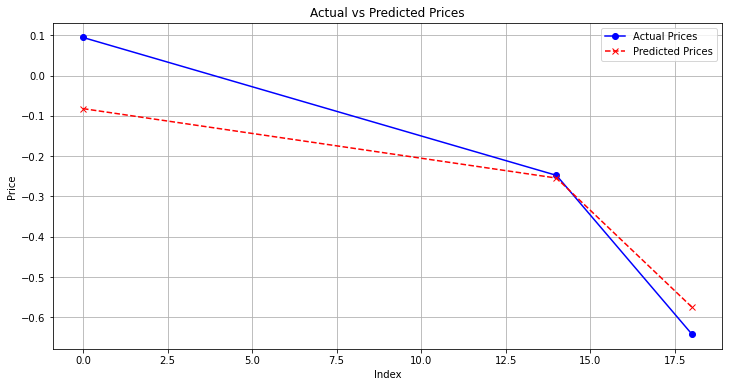

In [106]:
# Assuming y_test and predictions are already defined as before

# Sort the actual and predicted values for a clearer line plot
sorted_indices = y_test.argsort()
actual_sorted = y_test.iloc[sorted_indices]
predicted_sorted = r_predictions[sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(actual_sorted.index, actual_sorted, label='Actual Prices', color='blue', linestyle='-', marker='o')
plt.plot(actual_sorted.index, predicted_sorted, label='Predicted Prices', color='red', linestyle='--', marker='x')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
#GRADIENT BOOSTING REGRESSOR
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [100]:
predictions = gbm.predict(X_test)

In [101]:
#metrics
gbm_mae = mean_absolute_error(y_test, predictions)
gbm_mse = mean_squared_error(y_test, predictions)
gbm_r2 = r2_score(y_test, predictions)
gbm_mae,gbm_mse,gbm_r2

(0.08739447015651065, 0.01076426470527008, 0.8809737144767231)

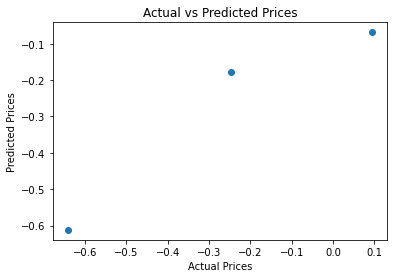

In [102]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

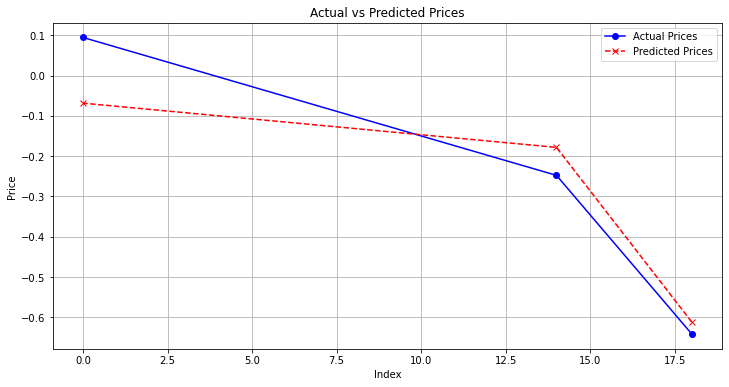

In [103]:
# Assuming y_test and predictions are already defined as before

# Sort the actual and predicted values for a clearer line plot
sorted_indices = y_test.argsort()
actual_sorted = y_test.iloc[sorted_indices]
predicted_sorted = predictions[sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(actual_sorted.index, actual_sorted, label='Actual Prices', color='blue', linestyle='-', marker='o')
plt.plot(actual_sorted.index, predicted_sorted, label='Predicted Prices', color='red', linestyle='--', marker='x')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


In [108]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Define the model
gbm = GradientBoostingRegressor()

# Define hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(100, 400, 50),
    'learning_rate': np.linspace(0.01, 0.1, 10),
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gbm, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit to the training data
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 350, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.09000000000000001}


In [109]:
best_gbm = random_search.best_estimator_
best_gbm.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.09000000000000001, n_estimators=350,
                          subsample=0.9)

In [110]:
#metrics
rgbm_mae = mean_absolute_error(y_test, predictions)
rgbm_mse = mean_squared_error(y_test, predictions)
rgbm_r2 = r2_score(y_test, predictions)
rgbm_mae,rgbm_mse,rgbm_r2

(0.08739447015651065, 0.01076426470527008, 0.8809737144767231)

In [118]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Step 3: Define the Hyperparameter Grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 5: Set Up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations (adjust based on computation limits)
    cv=3,        # Cross-validation folds
    verbose=2,   # Level of verbosity
    n_jobs=-1,   # Use all available cores
    random_state=42
)

# Step 6: Fit the Randomized Search to Training Data
random_search.fit(X_train, y_train)

# Step 7: Get the Best Parameters
print("Best Hyperparameters:", random_search.best_params_)

# Step 8: Evaluate the Best Model on Test Data
best_rf = random_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Step 9: Evaluate Using Metrics
wmae = mean_absolute_error(y_test, y_pred)
wmse = mean_squared_error(y_test, y_pred)
wr2 = r2_score(y_test, y_pred)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


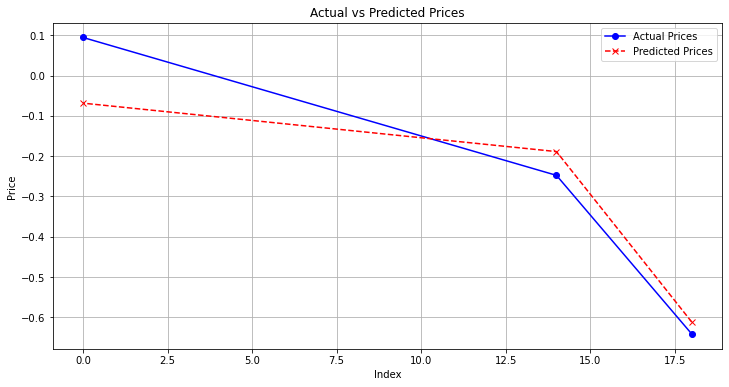

In [124]:
sorted_indices = y_test.argsort()
actual_sorted = y_test.iloc[sorted_indices]
predicted_sorted = y_pred[sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(actual_sorted.index, actual_sorted, label='Actual Prices', color='blue', linestyle='-', marker='o')
plt.plot(actual_sorted.index, predicted_sorted, label='Predicted Prices', color='red', linestyle='--', marker='x')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize the GBM model
gbm = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
best_gbm = grid_search.best_estimator_
y_pred = best_gbm.predict(X_test)



Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}


In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

qmae = mean_absolute_error(y_test, y_pred)
qmse = mean_squared_error(y_test, y_pred)
qr2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.06637970028122005
Mean Squared Error: 0.012178211752505726
R-squared: 0.865338938710138


In [121]:
wmae,wmse,wr2

(0.07477315035403996, 0.009489144058545165, 0.8950734117927319)

In [122]:
from sklearn.model_selection import train_test_split, GridSearchCV

rf = RandomForestRegressor()

# Setting the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Performing Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Predicting using the best model
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)




Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [123]:
vmae = mean_absolute_error(y_test, predictions)
vmse = mean_squared_error(y_test, predictions)
vr2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {vmae}')
print(f'Mean Squared Error: {vmse}')
print(f'R-squared: {vr2}')

Mean Absolute Error: 0.08222166764734769
Mean Squared Error: 0.009405142513443815
R-squared: 0.8960022622219428
